# Численные методы в Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

## Упражнение 1 "Действия над матрицами"

In [2]:
# задаем матрицу A
A = np.array([[1, 0], 
              [0, 1]])
# задаем матрицу B
B = np.array([[4, 1], 
              [2, 2]])
# вычисляем произведение матриц A и B
AB = np.dot(A, B)
print ("Матрица A:\n", A)
print ("Матрица B:\n", B)
print ("Произведение матриц AB:\n", AB)

Матрица A:
 [[1 0]
 [0 1]]
Матрица B:
 [[4 1]
 [2 2]]
Произведение матриц AB:
 [[4 1]
 [2 2]]


## Упражнение 2 "Системы линейных уравнений"

Решите систему линейных уравнений тремя способами: 
а) методом `numpy.linalg.solve`
б) методом Крамера (реализуйте метод самостоятельно)
в) методом обратной матрицы (реализуйте метод самостоятельно)

а) методом `numpy.linalg.solve`

In [3]:
A = np.array([[3, 1], 
              [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(A, b)
print ("Матрица A:\n", A)
print ("Вектор b:\n", b)
print ("Решение системы:\n", x)

Матрица A:
 [[3 1]
 [1 2]]
Вектор b:
 [9 8]
Решение системы:
 [2. 3.]


б) методом Крамера (реализуйте метод самостоятельно)

In [4]:
A = np.array([[3, 1], 
              [1, 2]])
b = np.array([9, 8])

Существует ли решение?

In [5]:
detA = np.linalg.det(A)
detA

5.000000000000001

$\det(A)\ne 0$, следовательно, система совместна

In [6]:
A1 = np.copy(A)
A1[:,0]=b
print('$x_1=$', np.linalg.det(A1)/np.linalg.det(A))

$x_1=$ 2.0


In [7]:
A2 = np.copy(A)
A2[:,1]=b
print('$x_2=$', np.linalg.det(A2)/np.linalg.det(A))

$x_2=$ 2.9999999999999996


в) методом обратной матрицы (реализуйте метод самостоятельно)

In [8]:
A = np.array([[3, 1], 
              [1, 2]])
b = np.array([9, 8])

Существует ли решение?

In [9]:
detA = np.linalg.det(A)
detA

5.000000000000001

$\det(A)\ne 0$, следовательно, система совместна

In [10]:
x=np.dot(np.linalg.inv(A),b)
print ("Решение системы:\n", x)

Решение системы:
 [2. 3.]


## Упражнение 3 "Экстремум функции одной переменной"

Используя метод `minimize_scalar` библиотеки `scipy.optimize` выясните имеет ли функция $f(x)$ на интервале $(a, b)$ экстремумы.

__Замечание__: Последовательность шагов следующая
* Постройте график функции $f(x)$ 
* Если функция на интервале $(a, b)$ имеет несколько минимумов (максимумов) или точки разрыва, то разбейте интервал $(a, b)$ на интервалы "меньшей длины" и найдите экстремумы на них
* Для нахождения максимума функции $f(x)$, ее необходимо умножить на $-1$ и исследовать новую функцию на минимум

Минимум функции на интервале от -5 до 5: -1.3154541196314153
Точка минимума на интервале от -5 до 5: -0.9402890023440884


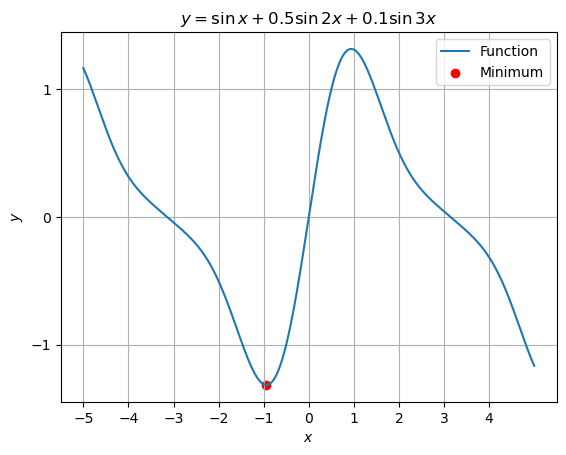

In [26]:
# Определение функции
def func(x):
    return np.sin(x) + 0.5*np.sin(2*x) + 0.1*np.sin(3*x)

# Построение графика функции
x_values = np.linspace(-5, 5, 1000)
y_values = func(x_values)

plt.plot(x_values, y_values, label='Function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=\\sin x + 0.5\\sin 2x + 0.1\\sin 3x$')
plt.grid(True)
# Установка делений на оси x с шагом 1
plt.xticks(np.arange(-5, 5, 1))

# Установка делений на оси x с шагом 1
plt.yticks(np.arange(-2, 2, 1))

# Нахождение минимума функции на интервале (-5, 5)
result = minimize_scalar(func, method='bounded', bounds=(-5, 5))

print("Минимум функции на интервале от -5 до 5:", result.fun)
print("Точка минимума на интервале от -5 до 5:", result.x)

plt.scatter(result.x, result.fun, color='red', label='Minimum')
plt.legend()
plt.show()

Максимум функции на интервале от -5 до 5: 1.3154541196314151
Точка максимума на интервале от -5 до 5: 0.9402890023442936


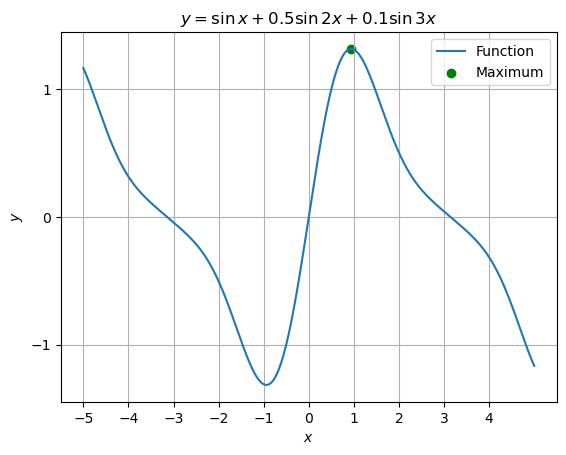

In [27]:
# Определение исходной функции 
def func(x):
    return np.sin(x) + 0.5*np.sin(2*x) + 0.1*np.sin(3*x)
# Определение функции для поиска максимума
def func2(x):
    return -1*(np.sin(x) + 0.5*np.sin(2*x) + 0.1*np.sin(3*x))


# Построение графика функции
x_values = np.linspace(-5, 5, 1000)
y_values = func(x_values)

plt.plot(x_values, y_values, label='Function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=\\sin x + 0.5\\sin 2x + 0.1\\sin 3x$')
plt.grid(True)
# Установка делений на оси x с шагом 1
plt.xticks(np.arange(-5, 5, 1))

# Установка делений на оси x с шагом 1
plt.yticks(np.arange(-2, 2, 1))

# Нахождение минимума функции на интервале (-5, 5)
result = minimize_scalar(func2, method='bounded', bounds=(-5, 5))

print("Максимум функции на интервале от -5 до 5:", -1*result.fun)# Поскольку мы максимизируем функцию, значения функции будут отрицательными
print("Точка максимума на интервале от -5 до 5:", result.x)

plt.scatter(result.x, -1*result.fun, color='green', label='Maximum')
plt.legend()
plt.show()

## Упражнение 4 "Интеграл Римана"

Используя метод `trapz` (метод трапеций) библиотеки `numpy` вычислите численно интеграл Ньютона ("определенный интеграл") 
* $\displaystyle \int\limits_{0}^{\pi}\sin{x}\,dx$

In [15]:
# Границы интегрирования
a = 0  # Нижний предел интегрирования
b = np.pi  # Верхний предел интегрирования

# Генерация точек для интегрирования
x = np.linspace(a, b, 1000)
# Определение функции
y = np.sin(x)

# Вычисление определенного интеграла методом трапеций
integral = np.trapz(y, x)

print('Определенный интеграл:', integral)


Определенный интеграл: 1.999998351770852
